In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    "../data/processed/zerodha_kite_reviews_with_topics.csv",
    parse_dates=["review_date"]
)

df.head()


,reviewId,userName,rating,review_text,review_date,thumbsUpCount,reviewCreatedVersion,clean_text,dominant_topic
0,6f8f3b4c-35d2-4341-9643-db463224271c,Sujay Roy,5,very easy to use,2025-12-12 12:13:27,0,3.9.1,easy use,2
1,cb99c260-3937-42bd-a6f1-af4091f75681,Andy Singh,4,watchlist 7 se baadhao 10 se 15 karo kyuki zer...,2025-12-12 11:53:12,0,NaN,watchlist baadhao karo kyuki zerodha sirf char...,3
2,e63d683c-fbd6-443f-b043-e1f3817c329a,VARUN KUMAR,1,I am unable to install this app in my mobile,2025-12-12 10:33:28,0,NaN,unable install app mobile,3
3,e433065f-ccb0-492e-8d72-550e25e36fdb,rahul kumar,1,give option to type price directly instead of ...,2025-12-12 09:56:28,0,3.10.1,give option type price directly instead calcul...,3
4,92329f60-ac5d-4294-99e5-fc8b017d32b7,Ramchandra Chobe,3,New update - charts are updating. not a good u...,2025-12-12 06:24:09,0,NaN,new update charts updating not good update,3


In [3]:
monthly_topic_counts = (
    df.set_index("review_date")
      .groupby("dominant_topic")
      .resample("ME")
      .size()
      .unstack(0)
      .fillna(0)
)

monthly_topic_counts.head()


C:\Users\swast\AppData\Local\Temp\ipykernel_22148\3598908805.py:5: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .size()


dominant_topic,0,1,2,3,4,5
review_date,,,,,,
2025-08-31,42,33,25,35,19,16
2025-09-30,199,72,66,152,87,49
2025-10-31,221,84,60,122,79,56
2025-11-30,137,72,74,146,57,48
2025-12-31,78,37,44,91,44,26


In [4]:
monthly_topic_share = monthly_topic_counts.div(
    monthly_topic_counts.sum(axis=1),
    axis=0
)

monthly_topic_share.head()


dominant_topic,0,1,2,3,4,5
review_date,,,,,,
2025-08-31,0.247059,0.194118,0.147059,0.205882,0.111765,0.094118
2025-09-30,0.318400,0.115200,0.105600,0.243200,0.139200,0.078400
2025-10-31,0.355305,0.135048,0.096463,0.196141,0.127010,0.090032
2025-11-30,0.256554,0.134831,0.138577,0.273408,0.106742,0.089888
2025-12-31,0.243750,0.115625,0.137500,0.284375,0.137500,0.081250


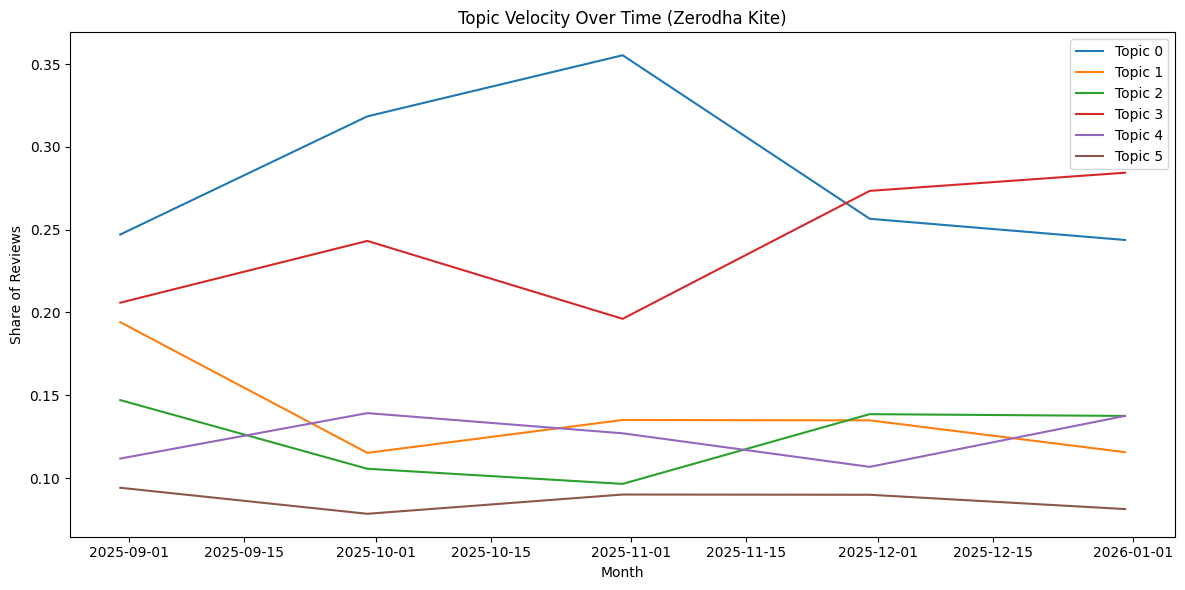

In [8]:
plt.figure(figsize=(12, 6))
for topic in monthly_topic_share.columns:
    plt.plot(
        monthly_topic_share.index,
        monthly_topic_share[topic],
        label=f"Topic {topic}"
    )
plt.title("Topic Velocity Over Time (Zerodha Kite)")
plt.xlabel("Month")
plt.ylabel("Share of Reviews")
plt.legend()
plt.tight_layout()
plt.savefig(
    "../visuals/topic_velocity_over_time.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


In [6]:
monthly_topic_share.to_csv(
    "../data/processed/zerodha_kite_topic_velocity.csv"
)
